# TP2 - Régression logistique

# Question 1.1

On pose u = -yi(xi^T w + w0)
***********************

Gradient par rapport à w0 : la somme se fait de i=1 à i=n : 

(1/(n*ln(10))  *   ∑((-yi)  /  (1+exp(-yi*(xi^T * w + w0))))

= (1/(n*ln(10))  *   ∑[(-yi)  /  (1+exp(u)]

***********************


Gradient par rapport à w : la somme se fait de i=1 à i=n : 

(1/(n*ln(10))  *   ∑((-yi*xi)  /  (1+exp(-yi*(xi^T * w + w0)))) + rho * w

= (1/(n*ln(10))  *   ∑ [(-yi*xi)  /  (1+exp(u))] + rho * w
***********************



G(w0,w) = (1/(n*ln(10))  *   ∑ [(-yi)  /  (1+exp(u))] * [1,xi]  + rho * [0,w]

(les vecteurs [1,xi] et [0,w] sont des vecteurs colonnes)


Calculons la matrice hessienne :

H = (1/(n*ln(10))  *   ∑((yi^2)  /  ((2*cosh(yi*((xi^T * w + w0) /2)^2) * [1,xi] * [1,xi]^T + [[0,0],[0,rho*I]]

[1,xi] est un vecteur colonne

H est définie positive donc la fonction est convexe

# Question 1.2

In [7]:
from cervicalcancerutils import load_cervical_cancer
import numpy as np
import scipy as sp
import math
from scipy.optimize import check_grad
X,y = load_cervical_cancer("riskfactorscervicalcancer.csv")
n,p = X.shape
X = np.column_stack((np.ones(n),X))
rho = 1./n
def f(w):
    return float(sum(np.log(1+np.exp(-y[i]*(np.matrix(X[i,:])).dot(w.T))) for i in range(y.shape[0])))/n + rho/2. * np.linalg.norm(w)**2
def grad(w):
    return np.ravel(1./n * sum(-y[i]/(1+np.exp(y[i]*(np.matrix(X[i,:])).dot(w.T)))*X[i,:].T for i in range(y.shape[0])) + rho * w)
def hess(w):
    hessienne = 1./n * sum (float(y[i]**2/(2*np.cosh(y[i]/2*(np.matrix(X[i,:])).dot(w.T)))**2) * (np.matrix(X[i,:]).T*np.matrix(X[i,:])) for i in range(y.shape[0]))+rho * np.eye(X.shape[1])
    hessienne[0,0]-=rho
    return hessienne

w_init=np.ones(p+1)
print(grad(w_init))
print(hess(w_init))
print(check_grad(f,grad,w_init))

[-0.10806849  0.16762328  0.08943686  0.07932573  0.13480013  0.14270294
  0.14383831  0.13207348  0.05120594  0.07887357  0.09365882  0.07975509
  0.13445739  0.11284862  0.07308809  0.07308809  0.1160873   0.01256654
  0.05209113  0.08173799  0.10670863  0.13590913  0.1357164   0.02863087
  0.05444503  0.02863087  0.05212031]
[[  4.51535181e-02   1.07092702e-02   1.45759365e-02   1.32495927e-02
    1.46188329e-02   3.97986068e-03  -4.85968354e-03  -1.48432557e-04
    1.99071814e-02   5.70383520e-03   1.02808909e-03  -1.31248907e-03
   -1.65912197e-02  -1.51439042e-02  -1.20586032e-02  -1.20586032e-02
   -7.05179018e-03  -3.12333164e-03  -8.98509360e-03  -3.12333416e-03
   -1.47143612e-02  -1.18406161e-02  -1.17170887e-02  -9.54828881e-03
   -5.42487523e-03  -9.54828881e-03  -1.00788621e-02]
 [  1.07092702e-02   3.22775409e-02   7.19514017e-04   1.79717020e-02
    2.73638201e-03  -8.64362891e-03  -5.52337393e-03  -3.09855945e-03
   -5.16390342e-04   3.89123470e-03  -4.80244691e-03  -3

# Question 1.3

In [8]:
import matplotlib.pyplot as plt

def newton(w):
    gradient = grad(w)
    hessienne = hess(w)
    k=0
    
    while(np.linalg.norm(gradient)>10e-10):
        k=k+1
        d=-np.linalg.inv(hessienne).dot(gradient)
        w=w+d
        gradient=grad(w)
        hessienne=hess(w)
        plt.plot(gradient)
        
    return(w,k)

newton(np.zeros(p+1))

(matrix([[ 0.19122153, -0.17203309, -0.04810578, -0.14870863,  0.17237958,
          -0.00698031,  0.20650566, -0.03690998,  0.07711366,  0.43045089,
           0.12941497,  0.17248157,  0.31840133,  0.17367958,  0.1042114 ,
           0.1042114 , -0.39129987,  0.16061291,  0.65549229, -0.3324718 ,
           0.63672924, -0.3931593 , -0.39323339,  0.38164194,  0.03076257,
           0.38164194,  0.27421301]]), 9)

AttributeError: 'float' object has no attribute 'T'

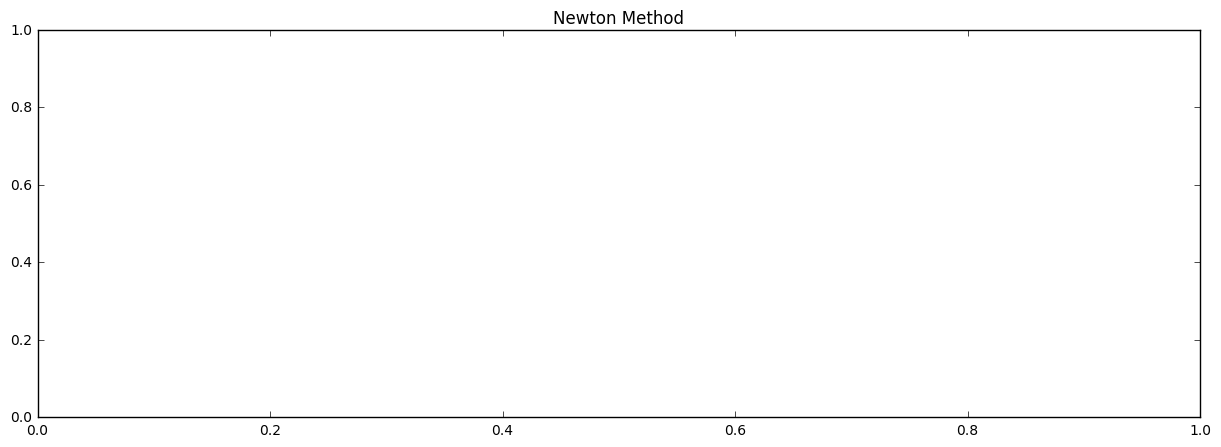

In [9]:
import matplotlib.pyplot as plt
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('Newton Method')
plt.loglog(newton(1e-10)[1])
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.show()

# Question 1.4

In [4]:
A = np.zeros(p+1)

def build(A):
    for k in range(len(A)):
        A[k]+=0.3
    return A  

np.linalg.inv(hess(build(A)))

matrix([[  3.62576224e+01,  -4.83534656e-01,  -4.08445154e-01,
          -1.82565150e-01,  -5.70108170e-01,  -1.98991183e+00,
           4.39000796e+00,   9.54564768e-01,  -8.31922270e-01,
           3.00073748e-01,   4.72361475e-01,   4.44371106e-01,
           7.43695739e-01,   7.04736059e+00,   8.19310654e-01,
           8.19310654e-01,   1.49676047e+01,   3.77346163e+00,
           1.83398437e+00,   1.45100381e+01,   1.17263779e+01,
           3.24678306e+01,   3.18862440e+01,   2.45329545e+00,
          -8.43050903e-01,   2.45329545e+00,   1.66963228e+00],
        [ -4.83534656e-01,   1.48581896e+01,  -2.01156012e+00,
          -4.33980683e+00,  -3.54492231e+00,   1.84253247e+00,
          -2.50432448e+00,  -2.46987350e+00,   2.93617962e+00,
          -3.62656563e+00,  -7.40599420e-01,  -1.07096385e+00,
           3.75053152e-01,   3.54575740e-01,   3.80034266e-01,
           3.80034266e-01,  -1.20120867e+00,   2.10454553e-01,
           1.02069414e+00,   3.89271968e-04,  -3.18077

On est hors de la région de convergence, donc la méthode de Newton diverge. C'est pour cela que l'on va utiliser line_search en 1.5.

# Question 1.5

# Question 2.1

En raison de la norme 1, la fonction n'est pas dérivable et donc on ne peut pas utiliser la méthode de Newton.

# Question 2.2

In [ ]:
On pose
g2 = rho * norme1(w)

